# 第一个机器学习程序

从某种程度上来说，这或许也能称的上是一个"Hello world!"，你好世界，我们要开始了！

## 首先我们需要加载数据集，这是一个手写数字分类的程序

In [1]:
import numpy as np  # 导入NumPy库
import pandas as pd  # 导入Pandas库
#import keras  # 从Keras中导入MNIST数据集  这里报废，只能手动下载
mnist=np.load('./mnist.npz')
x_train_image=mnist['x_train']
y_train_label=mnist['y_train']
x_test_image=mnist['x_test']
y_test_label=mnist['y_test']

In [2]:
print("数据集张量形状：",x_train_image.shape)  # 显示张量形状
print("第一个数据样本：\n",x_train_image[0])   

数据集张量形状： (60000, 28, 28)
第一个数据样本：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [3]:
print("第一个数据样本的标签：",y_train_label[0])

第一个数据样本的标签： 5


## 紧接着，需要对这堆数据集进行一些操作

In [4]:
from tensorflow.keras.utils import to_categorical  # 导入One-hot编码工具
x_train = x_train_image.reshape(60000, 28, 28, 1)  # 给标签增加一个维度
x_test = x_test_image.reshape(10000, 28, 28, 1)  # 给标签增加一个维度
y_train = to_categorical(y_train_label, 10)  # 特征转换为one-hot编码
y_test = to_categorical(y_test_label, 10)  # 特征转换为one-hot编码
print("训练集张量形状：",x_train.shape)  # 训练集张量的形状
print("第一个数据标签：",y_train[0])  # 显示标签的第一个数据

训练集张量形状： (60000, 28, 28, 1)
第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 我知道这部分可能第一次接触时有些难以理解，先什么都不要说，感受它，单纯的感受它就好

In [5]:
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = models.Sequential()  # 用序贯方式建立模型
model.add(Conv2D(32, (3,3), activation='relu',  # 添加Conv2D层
         input_shape=(28, 28, 1)))  # 指定输入数据样本张量的类型
model.add(MaxPooling2D(pool_size=(2,2)))  # 添加MaxPolling2D层
model.add(Conv2D(64, (3,3), activation='relu'))  # 添加Conv2D层
model.add(MaxPooling2D(pool_size=(2,2)))  # 添加MaxPolling2D层
model.add(Dropout(0.25))  # 添加Dropout层
model.add(Flatten())  # 展平
model.add(Dense(128, activation='relu'))  # 添加全连接层
model.add(Dropout(0.5))  # 添加Dropout层
model.add(Dense(10, activation='softmax'))  # Softmax分类激活，输出10维分类码
# 编译模型
model.compile(optimizer='rmsprop',   # 指定优化器
             loss='categorical_crossentropy',   # z指定损失函数
             metrics=['accuracy'])   # 指定验证过程中的评估指标

In [6]:
model.fit(x_train, y_train,   # 指定训练特征集和训练标签集
          validation_split=0.3,  # 部分训练集数据拆分成验证集
         epochs=5,  # 训练轮次为5轮
         batch_size=128)  # 以128为批量进行训练

Epoch 1/5
329/329 [==============================] - 11s 31ms/step - loss: 1.1905 - accuracy: 0.8153 - val_loss: 0.1038 - val_accuracy: 0.9715
Epoch 2/5
329/329 [==============================] - 10s 31ms/step - loss: 0.1873 - accuracy: 0.9487 - val_loss: 0.0901 - val_accuracy: 0.9763
Epoch 3/5
329/329 [==============================] - 10s 30ms/step - loss: 0.1326 - accuracy: 0.9650 - val_loss: 0.0605 - val_accuracy: 0.9846
Epoch 4/5
329/329 [==============================] - 10s 30ms/step - loss: 0.1096 - accuracy: 0.9703 - val_loss: 0.0707 - val_accuracy: 0.9838
Epoch 5/5
329/329 [==============================] - 10s 30ms/step - loss: 0.0952 - accuracy: 0.9742 - val_loss: 0.0555 - val_accuracy: 0.9868


In [7]:
score = model.evaluate(x_test, y_test)  # 在验证集上进行模型评估
print("测试集预测准确率：", score[1])   # 输出测试集上的预测准确率

313/313 [==============================] - 1s 3ms/step - loss: 0.0499 - accuracy: 0.9870
测试集预测准确率： 0.9869999885559082


## 最后，便是利用好我们已经训练的模型，现在非常轻松的就能去识别手写的数字了！

1/1 [==============================] - 0s 60ms/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 转换一下格式得到： 7


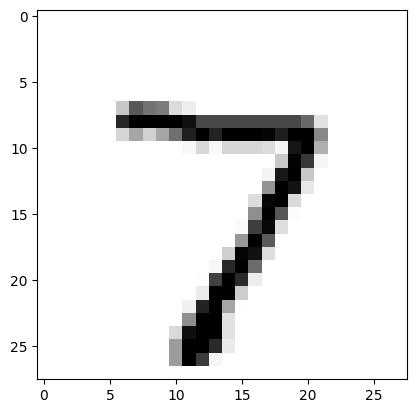

In [8]:
pred = model.predict(x_test[0].reshape(1, 28, 28, 1))  # 预测测试集的第一个数据
np.set_printoptions(suppress=True,   precision=5)  # 禁用科学计数法
print(pred[0],"转换一下格式得到：",pred.argmax())  # 把one-hot编码转换为数字
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[0].reshape(28, 28), cmap='Greys')  # 输出这个图片